**File name**: dispersion_values.ipynb<br>
**Authors**: Anton Karazeev &lt;[anton.karazeev@gmail.com](mailto:anton.karazeev@gmail.com)&gt;, Anton Lukashchuk &lt;[academik116@gmail.com](mailto:academik116@gmail.com)&gt;

This file is part of REDE project (https://github.com/akarazeev/REDE)

**Description**: ...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import os
import tqdm
import pickle
import scipy.io as spio

In [3]:
%load_ext autoreload
%autoreload 2

from prepare_dataset_keras import preproc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def df_by_filepath(filepath):
    # Load data.
    mat = spio.loadmat(filepath, squeeze_me=True)

    struct = mat['str']
    header = ['id']
    header.extend(struct[0][1].dtype.names)
    header

    # Create DataFrame.
    dataset = []

    for i in range(len(struct)):
        tmp = [int(struct[i][0])]
        tmp.extend([float(struct[i][1][name]) for name in header[1:]])
        dataset.append(tmp)

    df_data = pd.DataFrame(data=dataset, columns=header)
    return df_data, struct

In [5]:
df_data, struct = df_by_filepath('matlab_data/set_1848_elements.mat')
df_data.head()

,id,gap,width1,height,radius1,width2
0,1,2.500000e-07,0.000001,7.000000e-07,0.000018,8.000000e-07
1,2,2.500000e-07,0.000001,7.000000e-07,0.000018,8.400000e-07
2,3,2.500000e-07,0.000001,7.000000e-07,0.000018,8.800000e-07
3,4,2.500000e-07,0.000001,7.000000e-07,0.000018,9.200000e-07
4,5,2.500000e-07,0.000001,7.000000e-07,0.000018,9.600000e-07


In [50]:
# Generate dataset.
frequencies_modes_list = []
parameters_list = []
dispersions = []

for filepath in ['matlab_data/set_1848_elements.mat']:
    df_data, struct = df_by_filepath(filepath)

    for i in tqdm.tqdm(range(len(struct))):
        # Parameters.
        sample_id = int(struct[i][0])
        parameters = df_data[df_data['id'] == sample_id].values[0][1:]
        parameters_list.append(parameters)

        # Frequencies and modes.
        freqs, modes = struct[i][2][:, 0].real, struct[i][2][:, 2].real
        frequencies_modes_list.append((freqs, modes))

        # Dispersions.
        omega_total, delta_omega_total, D1_total, D2_total = preproc(freqs, modes)
        x = omega_total * 1e-12
        y = delta_omega_total * 1e-9
        dispersions.append((x, y))

100%|██████████| 1848/1848 [00:06<00:00, 286.36it/s]


In [51]:
[len(x[0]) for x in dispersions[:10]]

[18704, 18594, 18442, 18245, 18344, 18371, 16003, 16334, 16609, 16823]

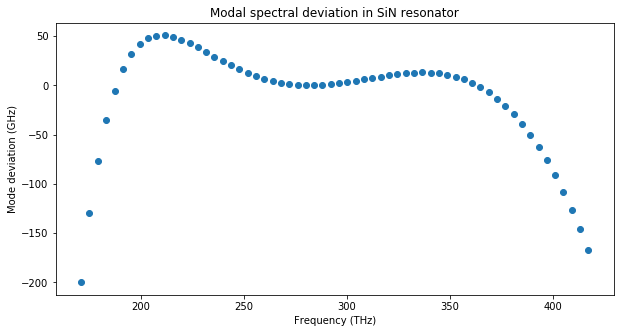

In [52]:
x, y = dispersions[1000]

plt.figure(figsize=(10,5))
plt.scatter(x[::300], y[::300])  # Plot each 300 data point.
plt.xlabel("Frequency (THz)")
plt.ylabel("Mode deviation (GHz)")
plt.title("Modal spectral deviation in SiN resonator")
plt.show()

In [53]:
# Parameters for 1000th simulation.
parameters_list[1000]

array([  4.00000000e-07,   1.55000000e-06,   7.50000000e-07,
         2.00000000e-05,   8.80000000e-07])

In [54]:
x[:10]

array([ 170.89033849,  170.90406565,  170.91779258,  170.93151929,
        170.94524577,  170.95897204,  170.97269809,  170.98642391,
        171.00014952,  171.01387491])

In [55]:
y[:10]

array([-199.94675728, -199.68261969, -199.41870339, -199.15500826,
       -198.89153414, -198.6282809 , -198.36524839, -198.10243648,
       -197.83984503, -197.57747389])